In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23406


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23401,2021-05-23,47,沖縄県,156,15081,0,148
23402,2021-05-24,47,沖縄県,104,15185,0,148
23403,2021-05-25,47,沖縄県,256,15441,0,148
23404,2021-05-26,47,沖縄県,302,15743,0,148
23405,2021-05-27,47,沖縄県,240,15983,0,148


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10956,8206,136
43,香川県,18426,1975,24
44,高知県,19422,1375,20
45,鳥取県,15438,463,2
46,鹿児島県,22908,3229,30


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23399,2021-05-21,47,沖縄県,207,14694,1,148,1073.0
23400,2021-05-22,47,沖縄県,231,14925,0,148,1144.0
23401,2021-05-23,47,沖縄県,156,15081,0,148,1222.0
23402,2021-05-24,47,沖縄県,104,15185,0,148,1267.0
23403,2021-05-25,47,沖縄県,256,15441,0,148,1355.0
23404,2021-05-26,47,沖縄県,302,15743,0,148,1454.0
23405,2021-05-27,47,沖縄県,240,15983,0,148,1496.0


### 感染者数前日比

In [5]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23401,2021-05-23,47,沖縄県,156,15081,0,148,1222.0,-0.324675,0.232042
23402,2021-05-24,47,沖縄県,104,15185,0,148,1267.0,-0.333333,0.219221
23403,2021-05-25,47,沖縄県,256,15441,0,148,1355.0,1.461538,0.164090
23404,2021-05-26,47,沖縄県,302,15743,0,148,1454.0,0.179688,0.159998
23405,2021-05-27,47,沖縄県,240,15983,0,148,1496.0,-0.205298,0.134188


In [6]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
497,北海道,3936.0,0.034483,-0.001991
995,青森県,184.0,-0.607843,0.011979
1493,岩手県,96.0,0.066667,0.006232
1991,宮城県,132.0,0.090909,0.085596
2489,秋田県,28.0,-0.333333,0.716837


In [7]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,11952,4802,103,186.0,-0.156250,0.158819
1,京都府,12948,15644,208,498.0,-0.358025,-0.060380
2,佐賀県,20418,2471,19,129.0,0.750000,0.117548
3,兵庫県,13944,39386,1148,1026.0,0.157143,0.033156
4,北海道,498,36527,1049,3936.0,0.034483,-0.001991


## 人口データを付与

In [8]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [9]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,11952,4802,103,186.0,-0.156250,0.158819,1813859
1,京都府,12948,15644,208,498.0,-0.358025,-0.060380,2545899
2,佐賀県,20418,2471,19,129.0,0.750000,0.117548,823810
3,兵庫県,13944,39386,1148,1026.0,0.157143,0.033156,5549568
4,北海道,498,36527,1049,3936.0,0.034483,-0.001991,5267762


## 人口当たりの感染者数

In [10]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,498,36527,1049,3936.0,0.034483,-0.001991,5267762,69.340642,693.406422,74.718638
41,青森県,996,2283,29,184.0,-0.607843,0.011979,1275783,17.894893,178.948928,14.422515
19,岩手県,1494,1396,43,96.0,0.066667,0.006232,1235517,11.298914,112.989137,7.770027
11,宮城県,1992,8801,83,132.0,0.090909,0.085596,2292385,38.392329,383.923294,5.758195
36,秋田県,2490,755,12,28.0,-0.333333,0.716837,985416,7.661739,76.617388,2.841440
15,山形県,2988,1932,40,134.0,-0.266667,-0.033878,1082296,17.850939,178.509391,12.381086
35,福島県,3486,4527,140,159.0,-0.357143,-0.011504,1881981,24.054441,240.544405,8.448544
38,茨城県,3984,9593,145,347.0,-0.242424,0.050317,2921436,32.836591,328.365913,11.877720
27,栃木県,4482,6226,75,243.0,-0.085106,0.096689,1965516,31.676160,316.761604,12.363166
37,群馬県,4980,7740,134,309.0,-0.406250,0.089902,1969439,39.300532,393.005318,15.689747


## 感染者数

### 平均値、中央値

In [11]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      15567.553191
std       28783.503290
min         463.000000
25%        2377.000000
50%        4734.000000
75%        9956.500000
max      159094.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [12]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6474,159094,2042,4095.0,-0.079408,0.015318,13834925,114.994480,1149.944796,29.599004
1,大阪府,13446,98919,2247,2278.0,-0.066465,-0.038641,8849635,111.777491,1117.774914,25.741175
2,神奈川県,6972,60625,878,1731.0,0.008889,-0.036476,9209442,65.829178,658.291784,18.795927
3,愛知県,11454,46113,758,3180.0,-0.114607,-0.032124,7575530,60.870989,608.709886,41.977261
4,埼玉県,5478,43325,780,1032.0,-0.207317,-0.025567,7390054,58.626094,586.260939,13.964715
5,兵庫県,13944,39386,1148,1026.0,0.157143,0.033156,5549568,70.971290,709.712900,18.487926
6,千葉県,5976,36734,676,800.0,-0.008197,0.043170,6319772,58.125515,581.255147,12.658685
7,北海道,498,36527,1049,3936.0,0.034483,-0.001991,5267762,69.340642,693.406422,74.718638
8,福岡県,19920,33505,435,1741.0,-0.151659,-0.101608,5129841,65.313915,653.139152,33.938674
9,沖縄県,23406,15983,148,1496.0,-0.205298,0.134188,1481547,107.880479,1078.804790,100.975534


## １万人あたりの感染者数

### 平均値、中央値

In [13]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      37.158943
std       26.300033
min        7.661739
25%       19.746030
50%       28.586841
75%       49.089700
max      114.994480
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [14]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,23406,15983,148,1496.0,-0.205298,0.134188,1481547,107.880479,1078.804790,100.975534
4,北海道,498,36527,1049,3936.0,0.034483,-0.001991,5267762,69.340642,693.406422,74.718638
24,愛知県,11454,46113,758,3180.0,-0.114607,-0.032124,7575530,60.870989,608.709886,41.977261
21,広島県,16932,10320,126,1101.0,-0.078313,-0.020416,2826858,36.506963,365.069629,38.947835
34,福岡県,19920,33505,435,1741.0,-0.151659,-0.101608,5129841,65.313915,653.139152,33.938674
26,東京都,6474,159094,2042,4095.0,-0.079408,0.015318,13834925,114.994480,1149.944796,29.599004
18,岡山県,16434,7185,100,554.0,-0.097561,-0.019471,1903627,37.743739,377.437387,29.102340
31,石川県,8466,3650,101,294.0,-0.500000,0.376290,1139612,32.028445,320.284448,25.798254
9,大阪府,13446,98919,2247,2278.0,-0.066465,-0.038641,8849635,111.777491,1117.774914,25.741175
44,高知県,19422,1375,20,177.0,0.407407,0.296271,709230,19.387223,193.872228,24.956643


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [15]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    45.000000
mean      0.067792
std       0.141180
min      -0.138358
25%      -0.019471
50%       0.039686
75%       0.115676
max       0.716837
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [16]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
36,秋田県,2490,755,12,28.0,-0.333333,0.716837,985416,7.661739,76.617388,2.841440
31,石川県,8466,3650,101,294.0,-0.500000,0.376290,1139612,32.028445,320.284448,25.798254
44,高知県,19422,1375,20,177.0,0.407407,0.296271,709230,19.387223,193.872228,24.956643
20,島根県,15936,526,0,44.0,-0.250000,0.245290,679324,7.742992,77.429916,6.477027
6,和歌山県,14940,2594,42,67.0,-0.333333,0.190136,954258,27.183424,271.834242,7.021162
16,山梨県,9462,1522,19,75.0,0.000000,0.171075,826579,18.413243,184.132430,9.073543
0,三重県,11952,4802,103,186.0,-0.156250,0.158819,1813859,26.473943,264.739431,10.254380
39,長崎県,20916,2857,63,54.0,1.500000,0.138776,1350769,21.150915,211.509148,3.997723
28,沖縄県,23406,15983,148,1496.0,-0.205298,0.134188,1481547,107.880479,1078.804790,100.975534
40,長野県,9960,4734,80,234.0,0.000000,0.122137,2087307,22.679941,226.799412,11.210617


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
43,香川県,18426,1975,24,92.0,-0.333333,-0.138358,981280,20.126773,201.267732,9.375510
34,福岡県,19920,33505,435,1741.0,-0.151659,-0.101608,5129841,65.313915,653.139152,33.938674
8,大分県,21912,3291,42,236.0,-0.421053,-0.067395,1151229,28.586841,285.868407,20.499831
1,京都府,12948,15644,208,498.0,-0.358025,-0.060380,2545899,61.447842,614.478422,19.560870
9,大阪府,13446,98919,2247,2278.0,-0.066465,-0.038641,8849635,111.777491,1117.774914,25.741175
32,神奈川県,6972,60625,878,1731.0,0.008889,-0.036476,9209442,65.829178,658.291784,18.795927
15,山形県,2988,1932,40,134.0,-0.266667,-0.033878,1082296,17.850939,178.509391,12.381086
24,愛知県,11454,46113,758,3180.0,-0.114607,-0.032124,7575530,60.870989,608.709886,41.977261
46,鹿児島県,22908,3229,30,204.0,0.000000,-0.025703,1630146,19.808042,198.080417,12.514217
7,埼玉県,5478,43325,780,1032.0,-0.207317,-0.025567,7390054,58.626094,586.260939,13.964715


## グラフ化

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [19]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


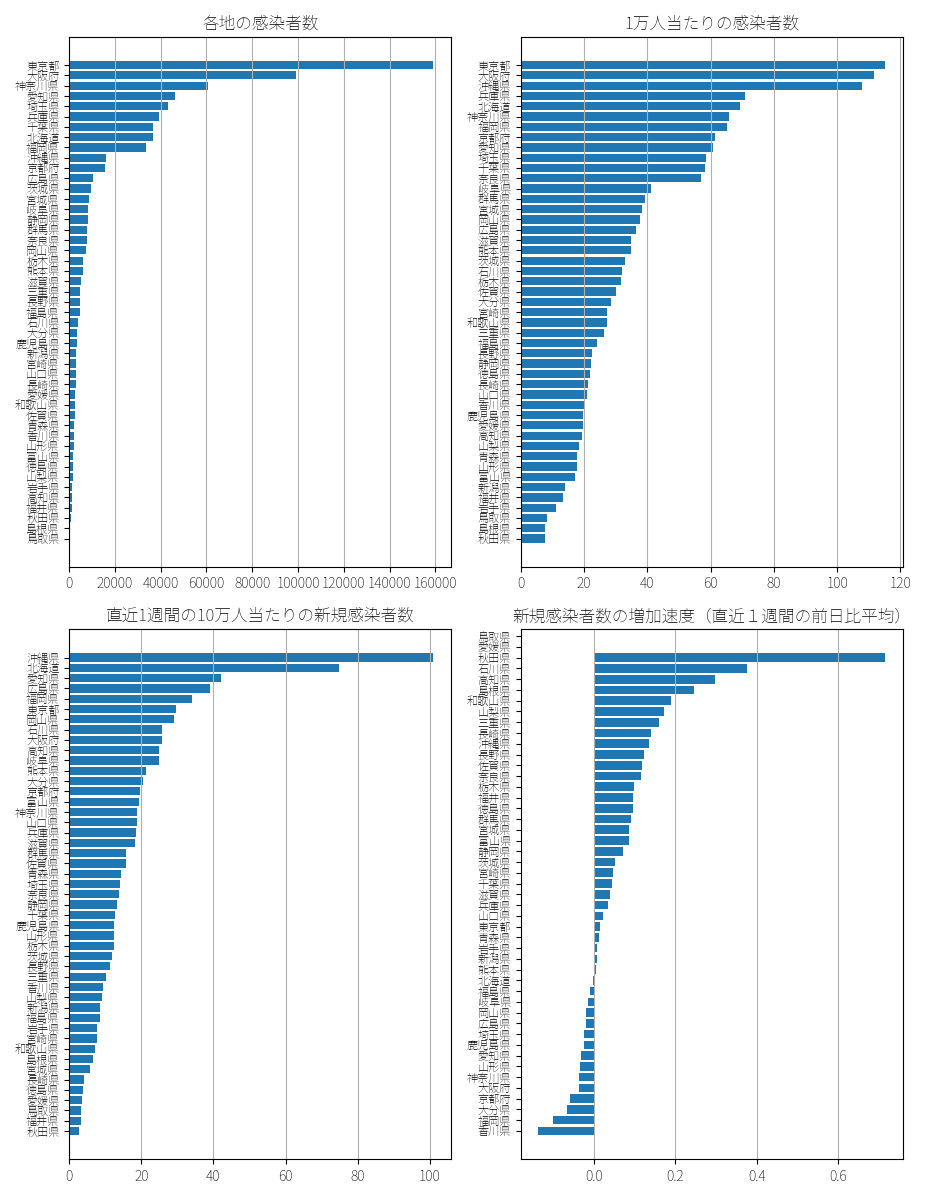

In [48]:
fig = plt.figure(figsize=(9.5,12))
plt.subplot(2,2,1) # (rows, columns, panel number)
#plt.xticks(rotation="70",fontsize=9)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["各地の感染者数合計"])
#plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.barh(chart_data["都道府県名"],chart_data["各地の感染者数合計"],align="center")
#plt.title("各地の感染者数", y=0.9)
plt.title("各地の感染者数")

plt.subplot(2,2,2) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["１万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数")

plt.subplot(2,2,3) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数")

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(2,2,4) # (rows, columns, panel number)
chart_data = all_jp.sort_values("直近1週間の新規感染者数前日比平均")
plt.yticks(fontsize=8)
plt.grid(axis="x")
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の新規感染者数前日比平均"])
plt.title("新規感染者数の増加速度（直近１週間の前日比平均）")

fig.tight_layout()


## 度数分布表

In [21]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   463.     20291.875  40120.75   59949.625  79778.5    99607.375
 119436.25  139265.125 159094.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


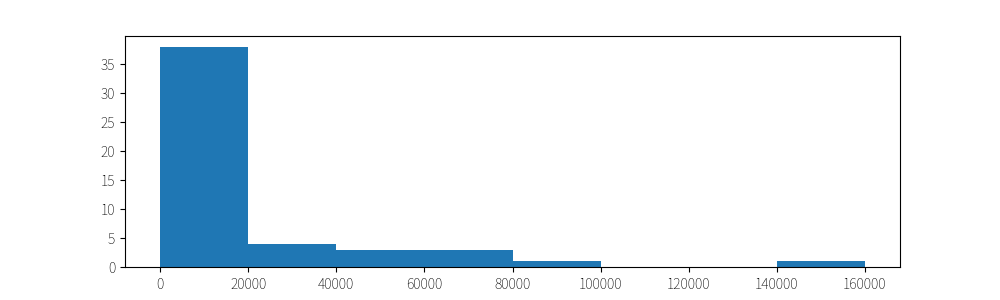

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [22]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


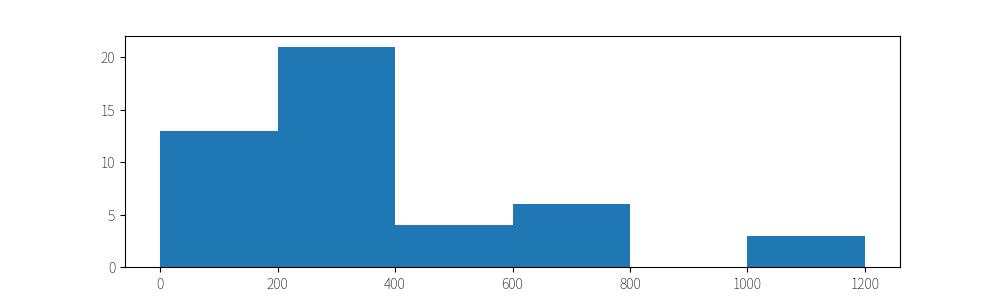

(array([13., 21.,  4.,  6.,  0.,  3.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [23]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
